In [87]:
import numpy as np
import pandas as pd

Load dữ liệu từ file CSV
Chúng ta có 5 cột chính bao gồm:
- Scale: Cường độ bão
- Duration: Thời gian bão
- Season: Thời gian bão đổ bộ (1: đầu mùa lúa, 3: giữa mùa lúa, 2: cuối mùa lúa)
- Distance: Khoảng cách đến Quảng Bình nơi tâm bão xảy ra (3: Quảng bình, 2: Giáp Quảng Bình, 1: Cách xa Quảng Bình)
- Yield: Sản lượng lúa của năm đó

In [88]:
data = pd.read_csv('storm.csv')
Crop_Yield = data['Yield']
X = data.drop(['Yield'], axis=1)
Scale = data['Scale']
Duration = data['Duration']
Season = data['Season']
Distance = data['Distance']
data.head()

,Scale,Yield,Duration,Season,Distance
0,16.5,47.1,2.0,2.0,3.0
1,12.5,51.4,2.0,2.0,3.0
2,7.0,51.4,3.0,3.0,1.0
3,8.5,51.4,2.0,2.0,1.0
4,6.5,51.4,1.0,1.0,3.0


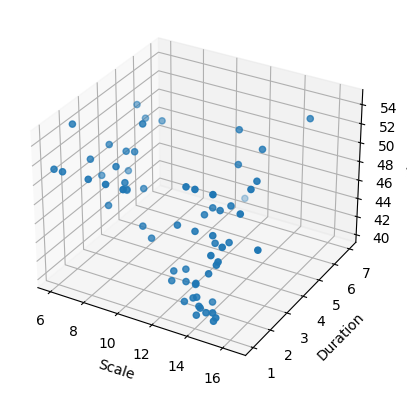

In [89]:
import matplotlib.pyplot as plt

# Biểu đồ thể hiện sự phụ thuộc của Yield vào Scale và Duration

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Scale, Duration, Crop_Yield)

ax.set_xlabel('Scale')
ax.set_ylabel('Duration')
ax.set_zlabel('Yield')

plt.show()


Như chúng ta có thể thấy, các điểm dữ liệu trên quá rời rạc nhau và khó có thể đưa ra kết luận 

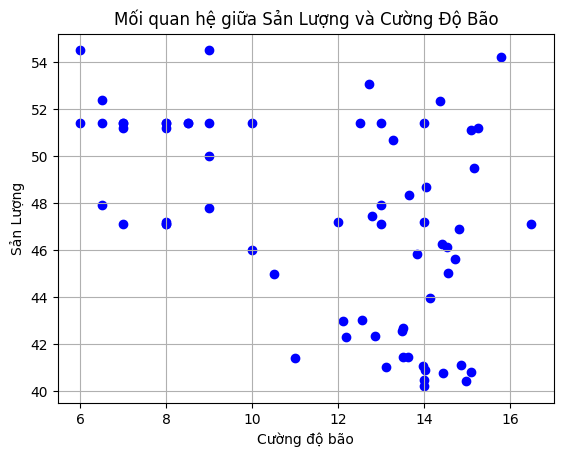

In [90]:
# Tiếp theo chúng ta đi tìm mối quan hệ giữa Yield và Scale
plt.scatter(Scale, Crop_Yield, color='b', marker='o')
plt.title('Mối quan hệ giữa Sản Lượng và Cường Độ Bão')
plt.xlabel('Cường độ bão')
plt.ylabel('Sản Lượng')
plt.grid(True)
plt.show()


In [91]:
df = pd.DataFrame({'Scale': Scale, 'Yield': Crop_Yield, 'Duration': Duration, 'Season': Season, 'Distance': Distance})
correlation = df['Scale'].corr(df['Yield'])

Đây là công thức Pearson tính hệ số tương quan giữa 2 biến ngẫu nhiên X và Y:
$$
r_{xy} = \frac{\sum\limits_{i = 1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sqrt{\sum\limits_{i = 1}^{n} (x_{i} - \bar{x})^{2} \sum\limits_{i = 1}^{n} (y_{i} - \bar{y})^{2}}}
$$

In [92]:
from scipy.spatial import distance


def distance_corr(X, Y):
    n = len(X)
    a = distance.pdist(X[:, None], 'euclidean')
    b = distance.pdist(Y[:, None], 'euclidean')
    A = distance.squareform(a)
    B = distance.squareform(b)
    A_bar = np.outer(np.mean(A, axis=1), np.ones(n))
    B_bar = np.outer(np.mean(B, axis=1), np.ones(n))
    A_diff = A - A_bar - A_bar.T + A_bar.mean()
    B_diff = B - B_bar - B_bar.T + B_bar.mean()
    cov = np.sum(A_diff * B_diff) / (n * n)
    var_a = np.sum(A_diff * A_diff) / (n * n)
    var_b = np.sum(B_diff * B_diff) / (n * n)
    return cov / np.sqrt(var_a * var_b)


Scale_Yield_corr = distance_corr(df['Scale'].to_numpy(), df['Yield'].to_numpy())
Duration_Yield_corr = distance_corr(df['Duration'].to_numpy(), df['Yield'].to_numpy())
Season_Yield_corr = distance_corr(df['Season'].to_numpy(), df['Yield'].to_numpy())
Distance_Yield_corr = distance_corr(df['Distance'].to_numpy(), df['Yield'].to_numpy())


print('Distance correlation between Scale and Yield: ', Scale_Yield_corr, '\n')
print('Distance correlation between Duration and Yield: ', Duration_Yield_corr, '\n')
print('Distance correlation between Season and Yield: ', Season_Yield_corr, '\n')
print('Distance correlation between Distance and Yield: ', Distance_Yield_corr, '\n')


Distance correlation between Scale and Yield:  0.24670065344571562 

Distance correlation between Duration and Yield:  0.26414776945659035 

Distance correlation between Season and Yield:  0.06049841226568402 

Distance correlation between Distance and Yield:  0.1052232948343041 



    - Một giá trị 0 ngụ ý rằng hai biến là độc lập thống kê với nhau.
    - Một giá trị 1 ngụ ý rằng có sự phụ thuộc hoàn hảo giữa hai biến.
    - Các giá trị giữa 0 và 1 thể hiện mức độ liên kết giữa các biến, với giá trị càng cao thì mối liên kết càng mạnh.


In [93]:
import statsmodels.api as sm

y = data['Yield']

X = sm.add_constant(data[['Scale', 'Duration', 'Season', 'Distance']])

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.31e-06
Time:                        11:28:56   Log-Likelihood:                -174.09
No. Observations:                  67   AIC:                             358.2
Df Residuals:                      62   BIC:                             369.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.7725      2.690     19.993      0.0

R-squared và Adj. R-squared:

R-squared cho biết khoảng 28.2% biến đổi của biến phụ thuộc Yield có thể được giải thích bởi mô hình. Tuy nhiên, chỉ số này không phản ánh chất lượng tốt nhất của mô hình, đặc biệt trong trường hợp có nhiều biến dự đoán.

Adj. R-squared (R-squared điều chỉnh) là 18.3%, thấp hơn R-squared và cho biết khi thêm các biến vào mô hình có thể không cải thiện đáng kể mức độ giải thích.
Hệ số (coef):

- const (chặn) có giá trị 55.5400, nghĩa là khi tất cả các biến độc lập đều bằng 0, giá trị dự đoán cho Yield là 55.5400.
- Scale có hệ số âm (-0.5399), cho thấy mối quan hệ âm giữa Scale và Yield.
- Duration cũng có hệ số âm (-0.6862), cho thấy mối quan hệ âm giữa Duration và Yield.
- Season và Distance có hệ số dương, nhưng giá trị của chúng thấp.
P-values (P>|t|):

- Biến Scale có p-value là 0.007, dưới mức ý nghĩa thống kê 0.05, cho thấy Scale có mối quan hệ đáng kể với Yield.
- Biến Duration có p-value gần 0.05 (0.090).
- Biến Season và Distance có p-values lớn, cho thấy chúng không có mối quan hệ đáng kể với Yield trong mô hình này.
Đánh giá mô hình:

Prob (F-statistic) là 0.0416, dưới mức ý nghĩa 0.05, cho thấy mô hình có ít nhất một biến độc lập ảnh hưởng đáng kể đến Yield.

Durbin-Watson: Được sử dụng để kiểm tra tính độc lập của các sai số. Giá trị này gần với 2, cho thấy không có sự tự tương quan đáng kể trong sai số.


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression(n_jobs=None)
model.fit(X_train, y_train)

print('Intercept: ', model.intercept_)

print('Coefficient of determination: %.2f' % model.score(X_test, y_test))


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)



Intercept:  56.745092931525676
Coefficient of determination: -0.14
Mean Absolute Error: 3.1861009376008984
Mean Squared Error: 12.885793318987213
Root Mean Squared Error: 3.5896787208589034
R-squared: -0.1351965688870327


**Intercept (Tiếp tuyến)**: Đây là hệ số tiếp tuyến của mô hình hồi quy tuyến tính. Nó thể hiện giá trị dự đoán của biến phụ thuộc khi tất cả các biến độc lập đều bằng 0. Trong ngữ cảnh của mô hình hồi quy tuyến tính, intercept tương đương với điểm mà đường thẳng hồi quy cắt trục y.

**Coefficient of Determination (Hệ số xác định)**: Đây chính là hệ số R-squared mà bạn tính bằng cách sử dụng model.score(X_test, y_test). Hệ số R-squared đo lường mức độ biến thiên của biến phụ thuộc có thể được giải thích bằng các biến độc lập trong mô hình. Giá trị R-squared nằm trong khoảng từ 0 đến 1, và giá trị càng gần 1 thì mô hình càng tốt trong việc giải thích biến thiên của dữ liệu.

**Mean Absolute Error (Sai số tuyệt đối trung bình)**: Đây là một phép đo về mức độ trung bình của sai số giữa các giá trị dự đoán và thực tế. Càng thấp giá trị này, mô hình càng tốt trong việc dự đoán.

**Mean Squared Error (Sai số bình phương trung bình)**: Đây là giá trị trung bình của bình phương của sai số giữa các giá trị dự đoán và thực tế. MSE có thể là một phép đo tốt khi đo lường sự tăng vượt quá trong việc dự đoán sai lệch.

**Root Mean Squared Error (Sai số bình phương trung bình căn bậc hai)**: Đây là căn bậc hai của Mean Squared Error (RMSE = sqrt(MSE)). RMSE thường được sử dụng để đo lường sự chênh lệch giữa các giá trị dự đoán và thực tế theo cùng đơn vị của biến phụ thuộc. Giá trị này càng thấp, mô hình càng tốt